In [1]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ygorf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_gs = pd.read_csv('ds_jobs_glassdoor.csv')
df_ind = pd.read_csv('ds_jobs_indeed.csv')

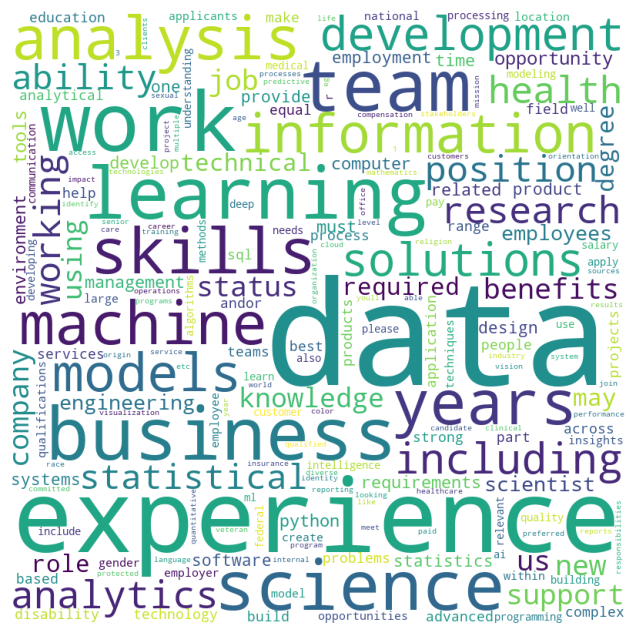

In [3]:
# Select the text column
text_data = df_gs["description"].str.cat(sep=' ') + df_ind["description"].str.cat(sep=' ')
# Clean the data
stop_words = set(stopwords.words('english'))
text_data = ''.join(char for char in text_data if char.isalnum() or char.isspace())
words = [word.lower() for word in text_data.split() if word.lower() not in stop_words]
# Create a frequency distribution
word_freq = Counter(words)
# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)
# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [5]:
# Create a frequency distribution
word_freq = Counter(words)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common()
most_common_words[:10]

[('data', 27432),
 ('experience', 12445),
 ('work', 7710),
 ('business', 5933),
 ('learning', 5810),
 ('team', 5701),
 ('science', 5324),
 ('skills', 4416),
 ('years', 4225),
 ('analysis', 3999)]

In [43]:
import re

def extract_salary(salary_range):
    # check if salary is per hour
    if 'Per Hour' in salary_range:
        # extract hourly rates from salary range
        matches = re.findall('\$(\d+\.\d+)', salary_range)
        if len(matches) == 2:
            # calculate annual salary using a 40-hour workweek and 52 weeks in a year
            hourly_salary_min = float(matches[0])
            hourly_salary_max = float(matches[1])
            mid_hourly_salary = (hourly_salary_min + hourly_salary_max) / 2
            annual_salary = mid_hourly_salary * 40 * 52
            return annual_salary
    else:
        # extract annual rates from salary range
        matches = re.findall('\$(\d+\.?\d*)', salary_range)
        if len(matches) == 2:
            if 'K' in salary_range:
                salary_min = float(matches[0]) * 1000
                salary_max = float(matches[1]) * 1000
            else:
                salary_min = float(matches[0])
                salary_max = float(matches[1])
            # calculate mid-range of annual salary
            mid_range = (salary_min + salary_max) / 2
            return mid_range

    # if no matches were found or there was an error, return None
    return None
    
a = []
for s in df_gs.salary_range.fillna('').to_list():
    if s != '':
        a.append(extract_salary(s))
    else:
        a.append(None)

a = pd.Series(a)
df_gs["salary_avg"] = a

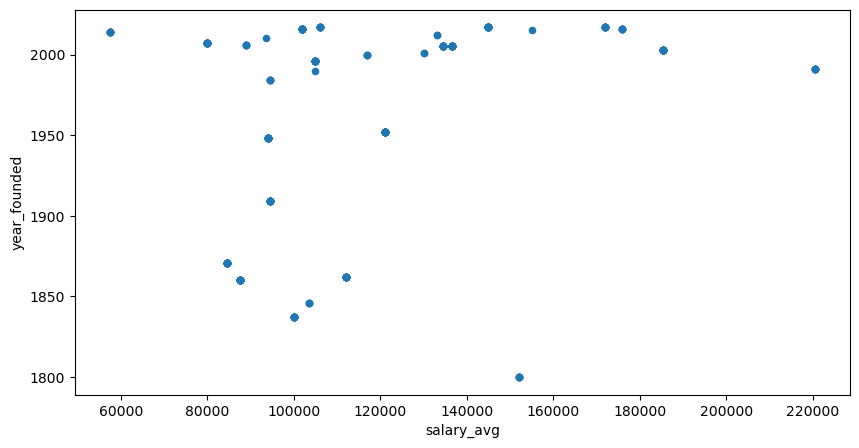

In [55]:
'''
make a plot with salary_avg on the x-axis and the year founded on the y-axis
'''
df_gs_salarys = df_gs.dropna(subset=['salary_avg']).reset_index(drop=True)
df_gs_salarys.plot.scatter(x='salary_avg', y='year_founded', figsize=(10, 5))
plt.show()


In [58]:
df_gs_salarys.head(3) 

,title,company,rating,date,location,salary_range,type,industry,sector,revenue,size,year_founded,description,salary_avg
1,Data Scientist,Tekwissenllc,NaN,2d,"New York, NY",$60.00 - $85.00 Per Hour(Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,Overview:TekWissen Group is a workforce manage...,150800.0
2,Jr. Data Scientist,"WhirlWind Technologies, LLC",4.8,30d+,Remote,$86K - $110K (Employer est.),Company - Public,NaN,NaN,$1 to $5 million (USD),1 to 50 Employees,NaN,Job Title/Level\nJr. Data Scientist\nLocation\...,98000.0
3,Data Scientist - Entry Level,Lawrence Livermore National Laboratory,4.4,15d,"Livermore, CA",$103K - $139K (Employer est.),Government,National Agencies,Government & Public Administration,$1 to $5 billion (USD),5001 to 10000 Employees,1952.0,Company Description\nJoin us and make YOUR mar...,121000.0


In [57]:
df_gs_salarys.groupby('sector').salary_avg.mean().sort_values(ascending=False).head(10)

sector
Arts, Entertainment & Recreation               152000.000000
Financial Services                             140124.444444
Insurance                                      133000.000000
Information Technology                         118029.810219
Healthcare                                     117630.769231
Government & Public Administration             117000.000000
Pharmaceutical & Biotechnology                 117000.000000
Construction, Repair & Maintenance Services    105000.000000
Management & Consulting                        105000.000000
Education                                      103500.000000
Name: salary_avg, dtype: float64

In [8]:
df_gs['year_founded'] = df_gs['year_founded'].astype(float)

In [6]:
df_gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         600 non-null    object 
 1   company       600 non-null    object 
 2   rating        555 non-null    float64
 3   date          600 non-null    object 
 4   location      600 non-null    object 
 5   salary_range  486 non-null    object 
 6   type          580 non-null    object 
 7   industry      450 non-null    object 
 8   sector        450 non-null    object 
 9   revenue       580 non-null    object 
 10  size          580 non-null    object 
 11  year_founded  446 non-null    float64
 12  description   600 non-null    object 
dtypes: float64(2), object(11)
memory usage: 61.1+ KB
